# Seasonal time series 계절 시계열

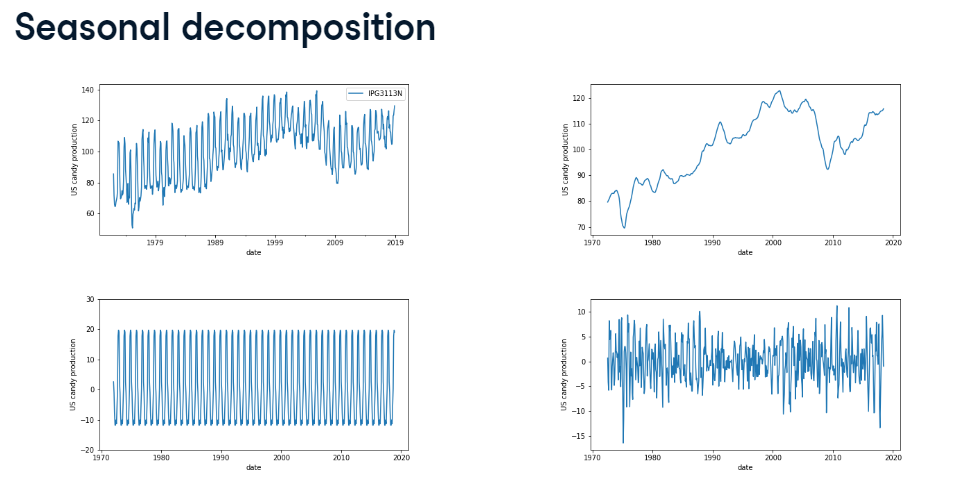

* 모든 시계열은 3가지 요소 추세 계절 잔차 이걸로 이뤄짐.
* 이 3가지 구성 요소로 분리하는 함수가 seasonal_decompose

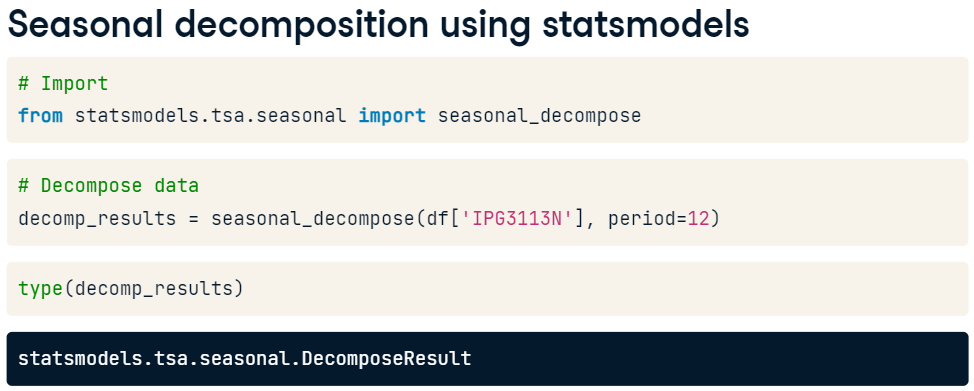

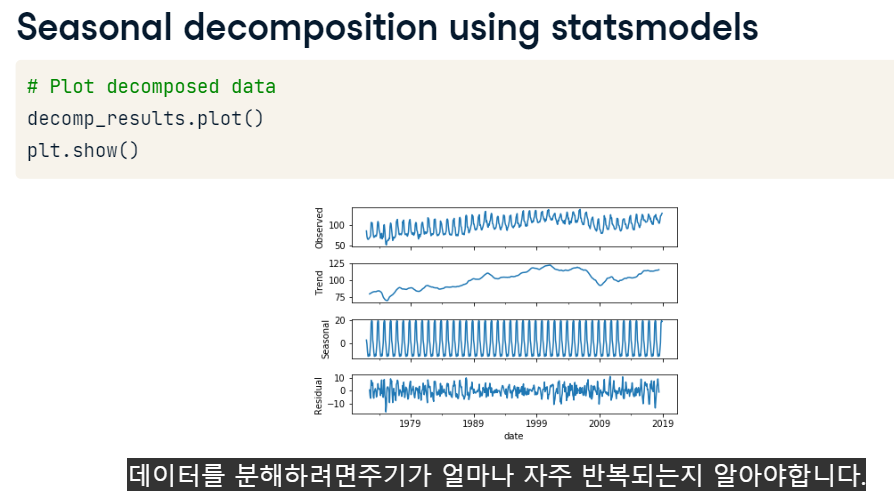

* 데이터를 분해하려면 주기가 얼마나 자주 반복되는 지를 알아야하는데
* 추측으로도 가능하짐나 ACF를 사용해서 기간 식별도 가능.


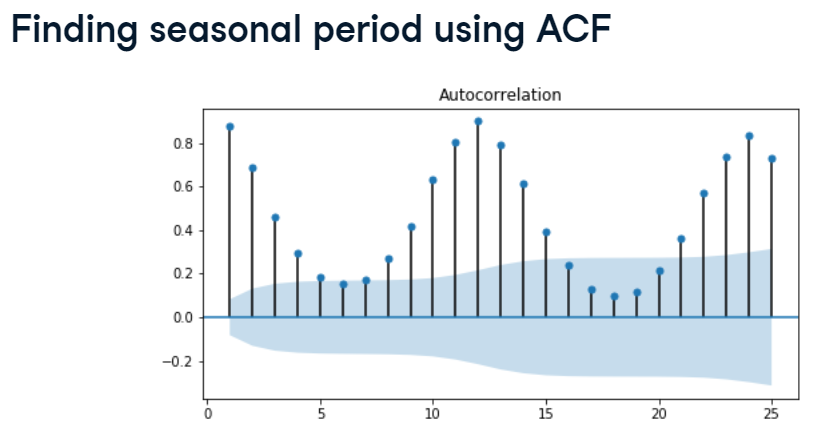

* 기간을 찾기 위해 ACF 플롯에서 피크인 1보다 큰 시차를 찾는다. 여기선 12. 그래서 계절 성분이 12시간 단계마다 반복된다고 판단.

* 시계열이 계저적인지 아닌지 육안으로 구별이 어려울때 ACF가 유용.

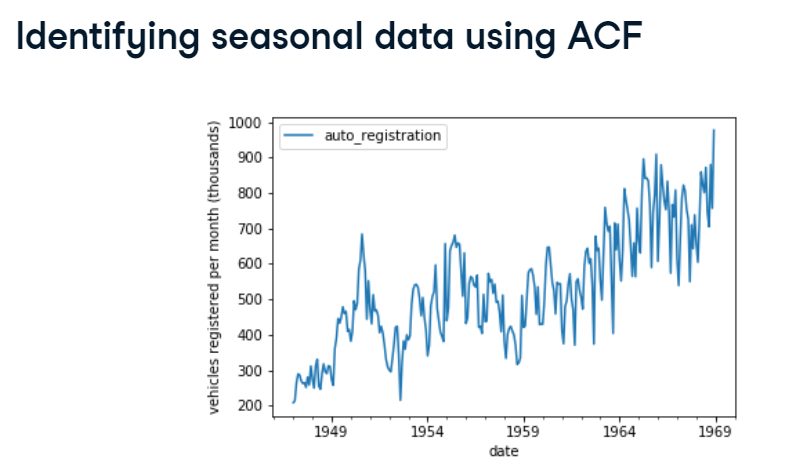

* 여기서 시계열이 비정상이니 먼저 추세를 제거하면 ACF플롯이 더 명확해짐.
* 연속 평균을 빼면 ACF 가 더 명확해져.
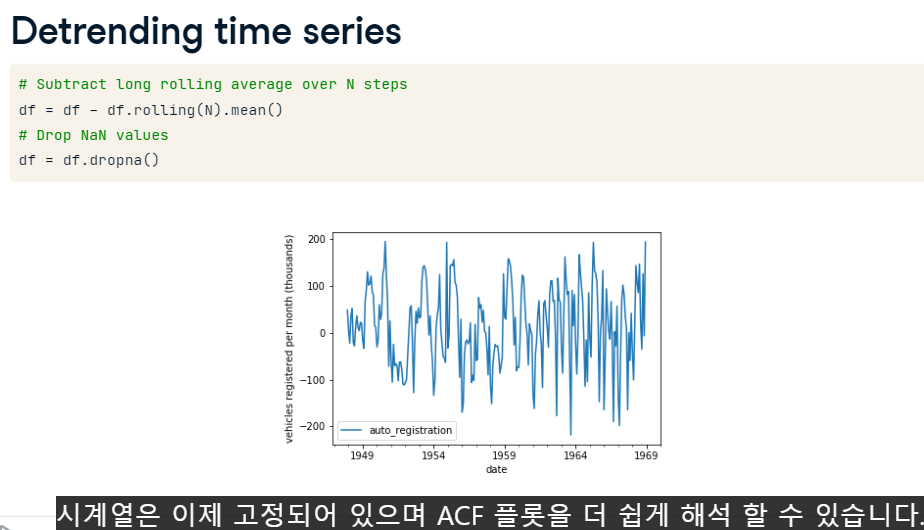

이렇게 바꾸고
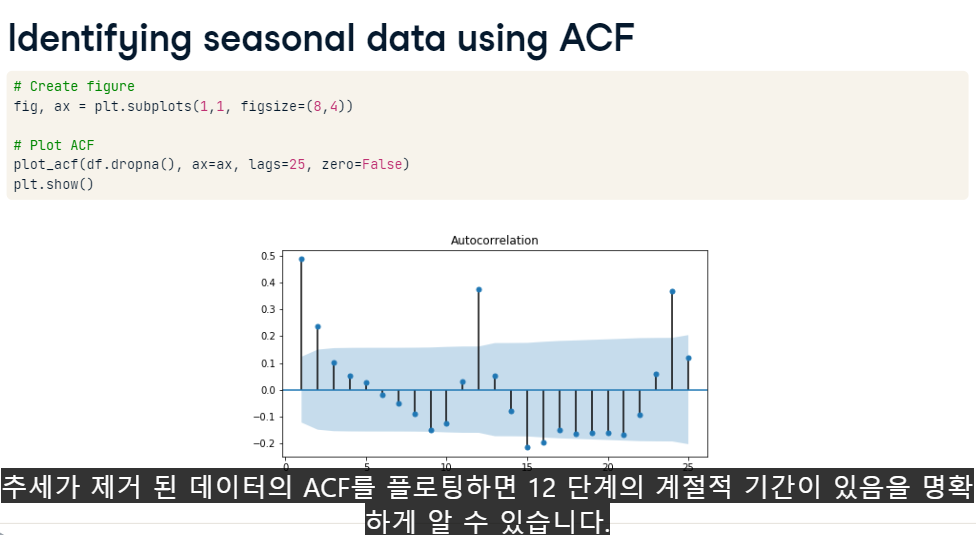

* 여기서 주기 12 알아냄.

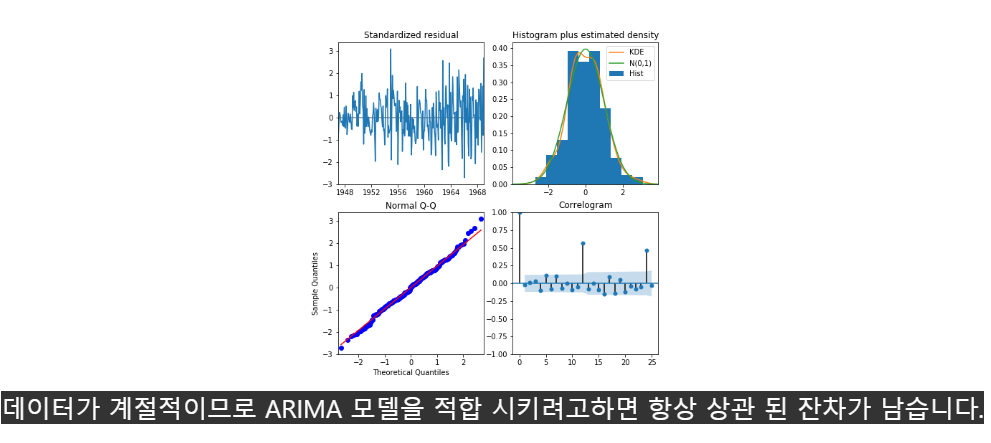

* 데이터가 계절성을 보이니 ARIMA 모델을 적용시키면 항상 correlated 된 잔차가 나옴. 이는 우리가 모든 정보를 사용하지 않았다는 의미. 이 경우 최선의 예측이 힘듬.

In [ ]:
# 퀴즈 1-1
# Import the seasonal_decompose() function from statsmodels.tsa.seasonal.
# Decompose the 'pounds_per_cow' column of milk_production using an additive model and period of 12 months.
# Plot the decomposition.


# Import seasonal decompose
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform additive decomposition
decomp = seasonal_decompose(milk_production['pounds_per_cow'], period=12)

# Plot decomposition
decomp.plot()
plt.show()

NameError: ignored

1-1

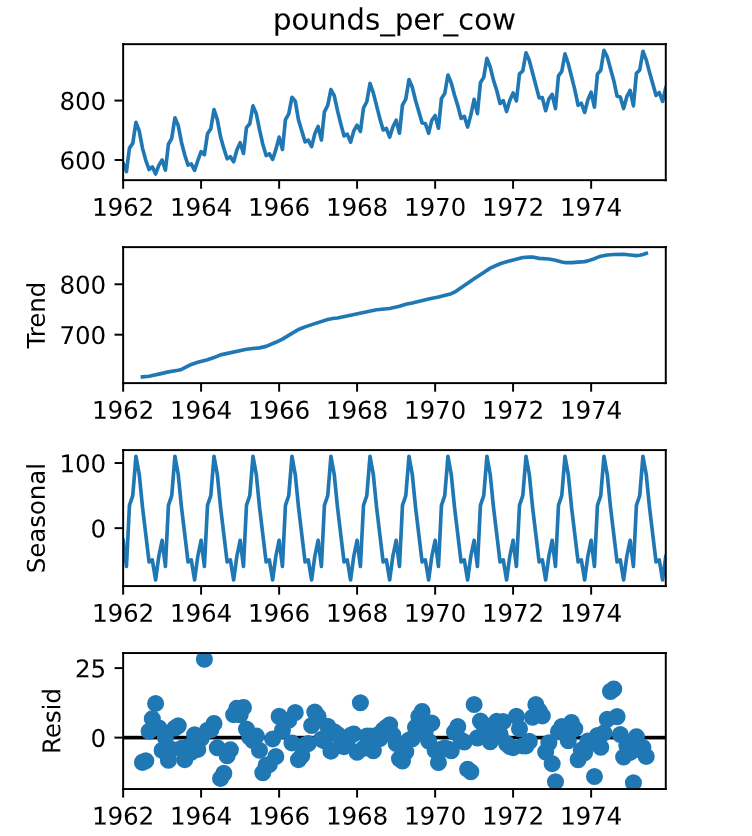

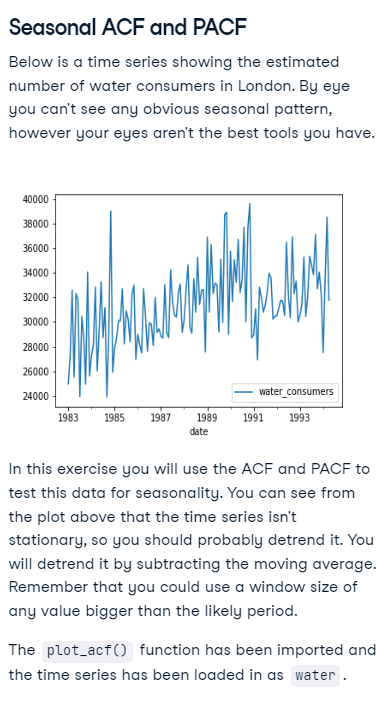

In [ ]:
#퀴즈 1-2-1

# Create figure and subplot
fig, ax1 = plt.subplots()

# Plot the ACF on ax1
plot_acf(water['water_consumers'], lags=25, zero=False,  ax=ax1)

# Show figure
plt.show()

NameError: ignored

4-1-1

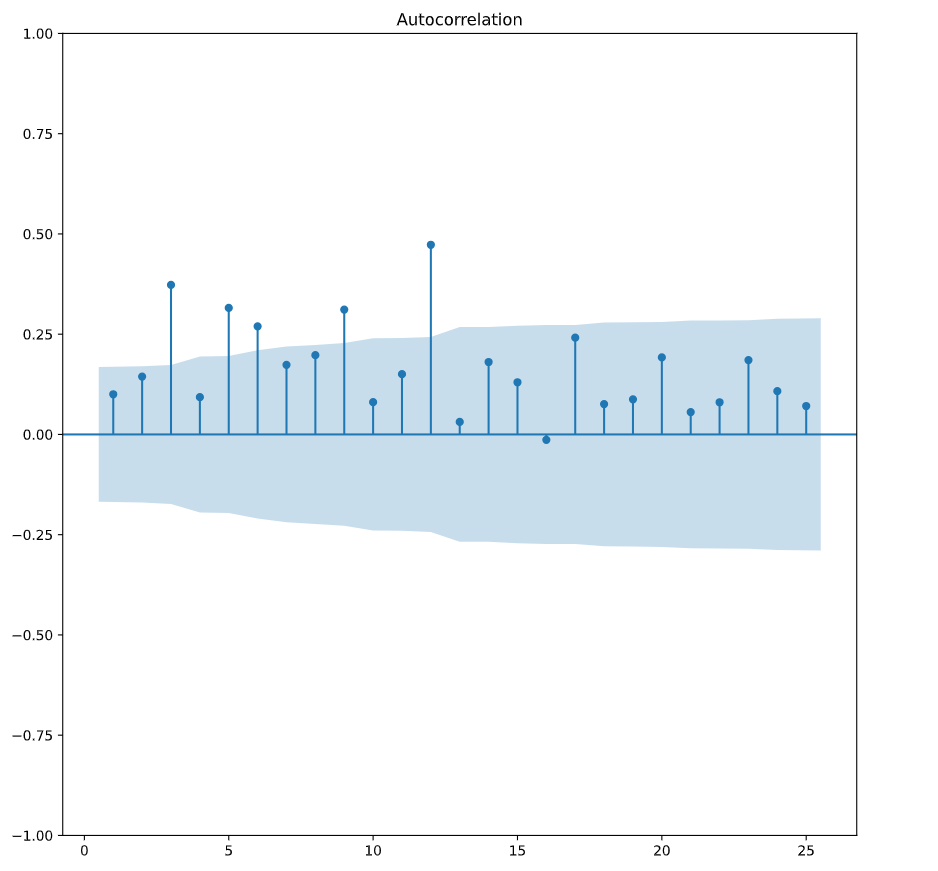

In [ ]:
# 1-2-2

# Subtract a 15 step rolling mean from the original time series and assign this to water_2
# Drop the NaN values from water_2

# Subtract the rolling mean
water_2 = water - water.rolling(15).mean()

# Drop the NaN values
water_2 = water_2.dropna()

# Create figure and subplots
fig, ax1 = plt.subplots()

# Plot the ACF
plot_acf(water_2['water_consumers'], lags=25, zero=False, ax=ax1)

# Show figure
plt.show()

NameError: ignored

1-2-2

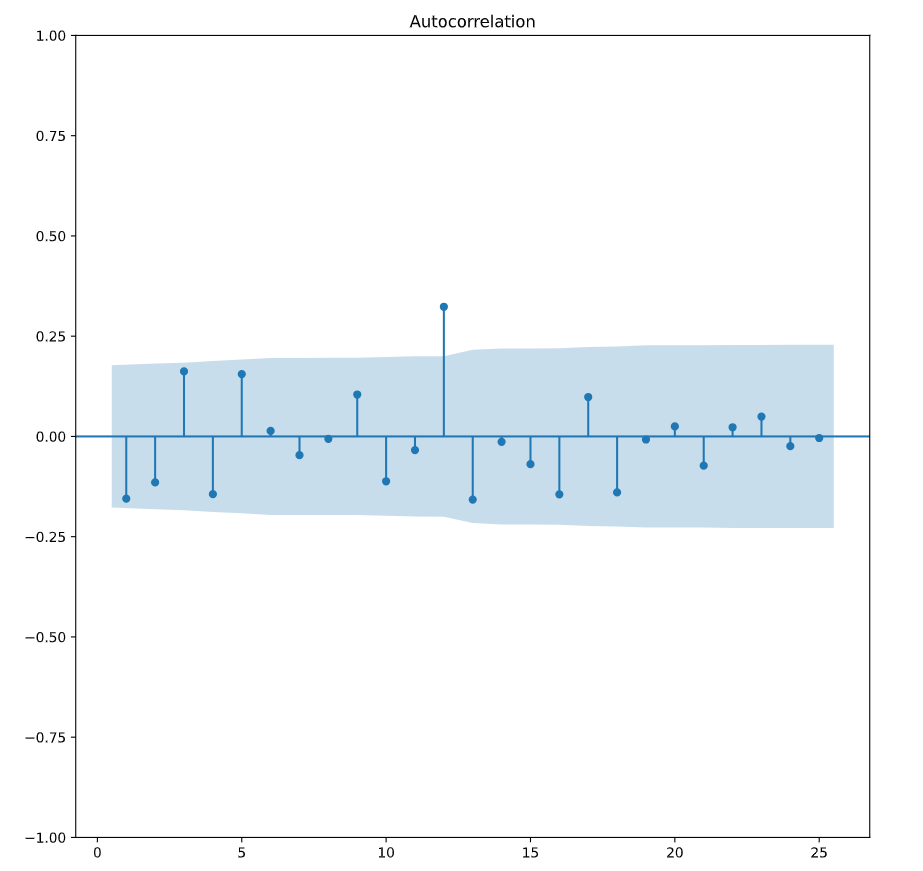

In [ ]:
# 1-2-3
# 여기서 주기는 피크가 1은 안넘어도 유일하고 가장 높은 유의미한 수치가 나온 12에서 주기.

# SARIMA Model ( = Seasonal ARIMA )

* 계절성을 찾는 방법을 알았고, 이를 활용해 더 정확한 예측을 수행하자.
* 시계열을 계절성 요소와 비계절성 요소로 나눈걸 배웠었는데 비슷하게 sARIMA 모델을 맞추는건 두 개의 다른 ARIMA 모델을 맞추는 것과 동일. 하나는 계절, 하나는 비계절.

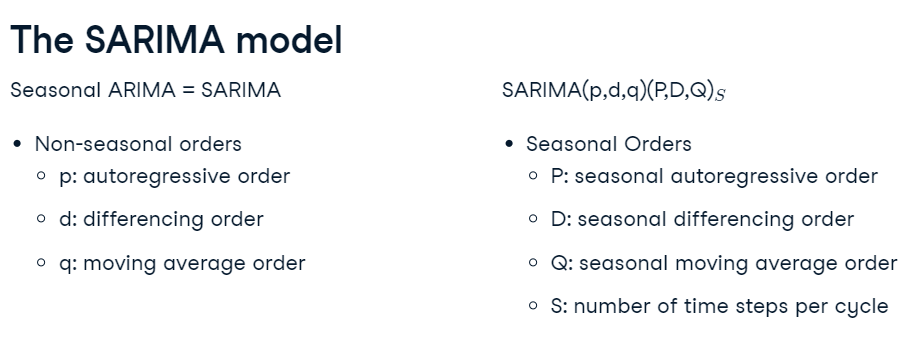

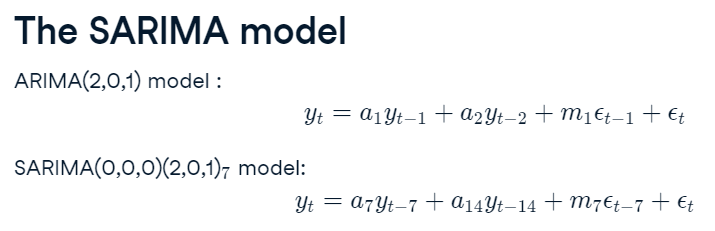

두 번째 식은  일반 계절성이 없는부분을 0으로 설정.


# Fitting a SARIMA model

* SARIMA 모델 fit하는건 ARIMA 하던거와 거의 동일.

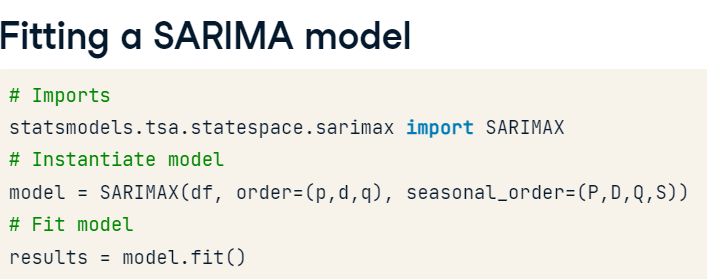

* 추가로 AC통해 주기 찾고 차분도 해야하고.

## Seasonal Differencing 계절성 차분
* 여기선 한 주기 전 시계열 값을 뺌.

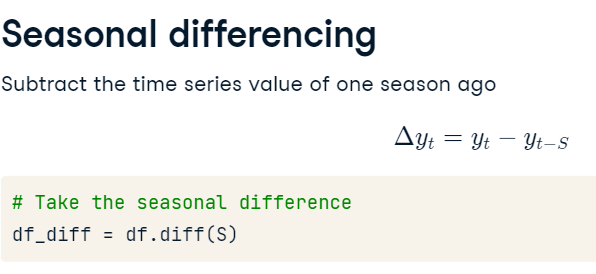


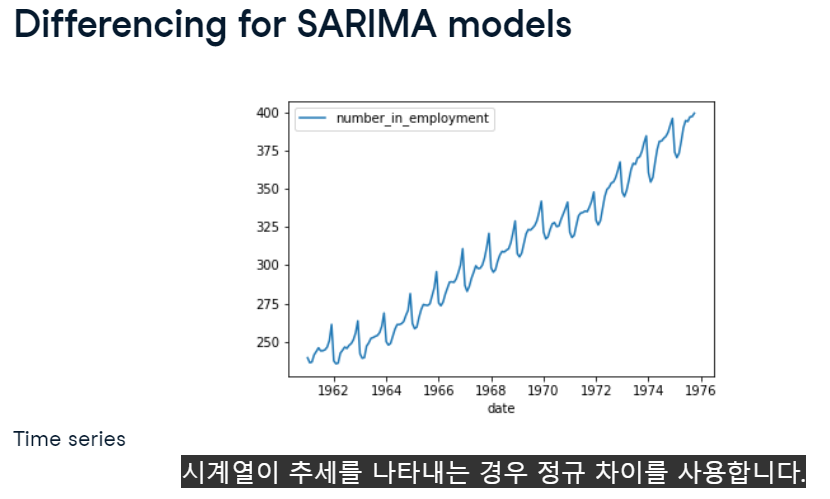

* 추세를 보이면 이와 관련 차분을 실시.
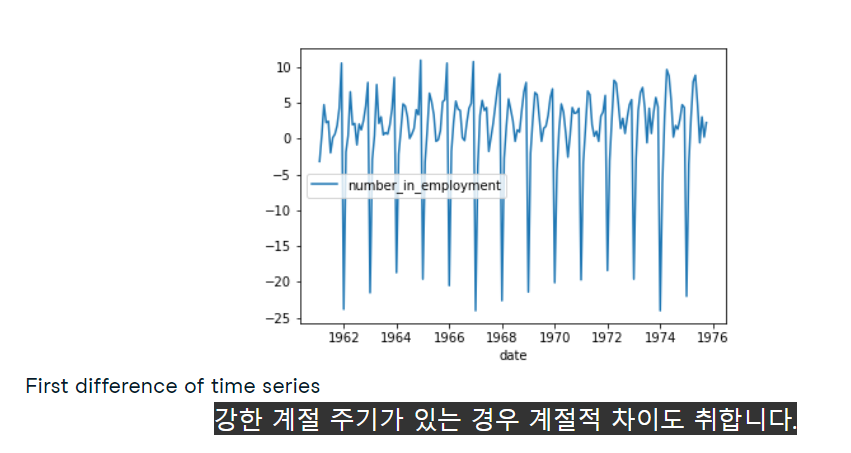

* 이후에 계절성을 보이면 계절성 차분을 추가적으로 진행.

* 비계절성 차수를 찾기 위해서 ACF와 차분 시계열 PACF를 플로팅.

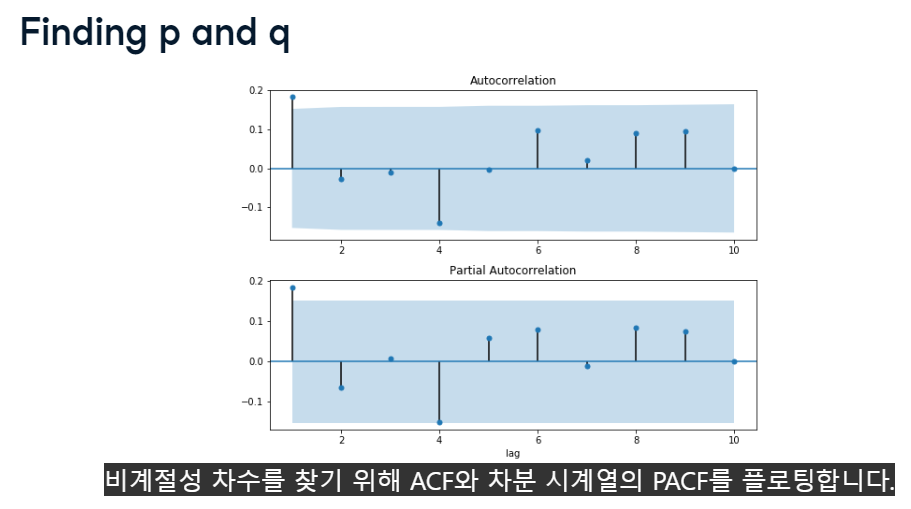

* 계절 순서를 찾기 위해 여러 계쩔에서 차분 시계열의 ACF와 PACF 플로팅.
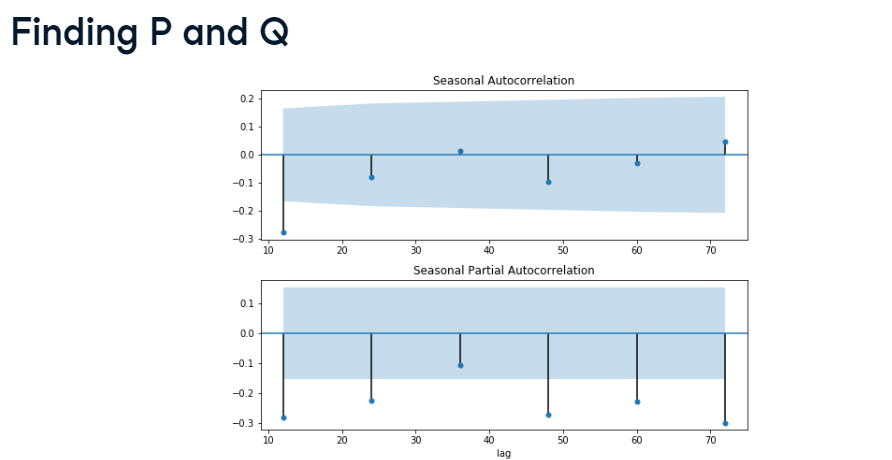

## Plotting seasonal ACF & PACF

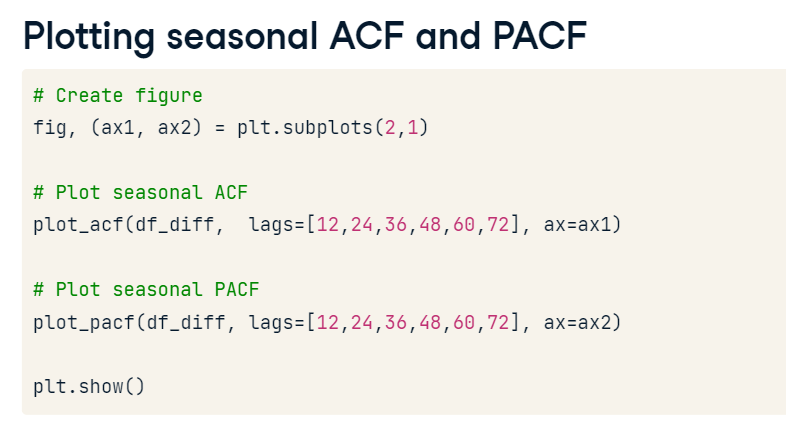

* 단 여기서 lag 파라미터는 최대값 대신 그 배수의 lag list로 설정. 이러면 특정 시차에서만의 ACF와 PACF가 표시.




In [ ]:
# 퀴즈 2-1

# Import the SARIMAX class
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Create a SARIMAX(1,0,0)(1,1,0)7
#  model and fit it to df1.
# Print the model summary table.

# Import the SARIMAX class
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Create a SARIMAX model
model = SARIMAX(df1, order=(1,0,0), seasonal_order=(1,1,0,7))

# Fit the model
results = model.fit()

# Print the results summary
print(results.summary())

# <script.py> output:
#                                          SARIMAX Results
#     =========================================================================================
#     Dep. Variable:                                 Y   No. Observations:                   90
#     Model:             SARIMAX(1, 0, 0)x(1, 1, 0, 7)   Log Likelihood                -556.180
#     Date:                           Fri, 18 Aug 2023   AIC                           1118.361
#     Time:                                   10:02:30   BIC                           1125.617
#     Sample:                               01-01-2013   HQIC                          1121.276
#                                         - 03-31-2013
#     Covariance Type:                             opg
#     ==============================================================================
#                      coef    std err          z      P>|z|      [0.025      0.975]
#     ------------------------------------------------------------------------------
#     ar.L1          0.1039      0.103      1.009      0.313      -0.098       0.306
#     ar.S.L7        0.2753      0.104      2.641      0.008       0.071       0.480
#     sigma2      3.852e+04   7196.907      5.353      0.000    2.44e+04    5.26e+04
#     ===================================================================================
#     Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.68
#     Prob(Q):                              0.97   Prob(JB):                         0.43
#     Heteroskedasticity (H):               1.36   Skew:                            -0.15
#     Prob(H) (two-sided):                  0.42   Kurtosis:                         2.37
#     ===================================================================================


# Create a SARIMA(2,1,1)(1,0,0)4
#  model and fit it to df2.

# Import the SARIMAX class
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Create a SARIMAX model
model = SARIMAX(df2, order=(2,1,1), seasonal_order=(1,0,0,4))

# Fit the model
results = model.fit()

# Print the results summary
print(results.summary())


#   SARIMAX Results
# ==========================================================================================
# Dep. Variable:                                  Y   No. Observations:                   80
# Model:             SARIMAX(2, 1, 1)x(1, 0, [], 4)   Log Likelihood                -560.340
# Date:                            Fri, 18 Aug 2023   AIC                           1130.679
# Time:                                    10:03:37   BIC                           1142.526
# Sample:                                01-01-2013   HQIC                          1135.426
#                                      - 03-21-2013
# Covariance Type:                              opg
# ==============================================================================
#                  coef    std err          z      P>|z|      [0.025      0.975]
# ------------------------------------------------------------------------------
# ar.L1          0.2701      0.162      1.672      0.095      -0.047       0.587
# ar.L2          0.5015      0.110      4.560      0.000       0.286       0.717
# ma.L1         -0.4271      0.178     -2.401      0.016      -0.776      -0.078
# ar.S.L4        0.1075      0.127      0.847      0.397      -0.141       0.356
# sigma2       8.45e+04   1.63e+04      5.178      0.000    5.25e+04    1.16e+05
# ===================================================================================
# Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.95
# Prob(Q):                              1.00   Prob(JB):                         0.62
# Heteroskedasticity (H):               0.60   Skew:                            -0.07
# Prob(H) (two-sided):                  0.20   Kurtosis:                         2.48
# ===================================================================================

# Create a SARIMA(1,1,0)(0,1,1)12
#  model and fit it to df3.


# Import the SARIMAX class
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Create a SARIMAX model
model = SARIMAX(df3, order=(1,1,0), seasonal_order=(0,1,1,12))

# Fit the model
results = model.fit()

# Print the results summary
print(results.summary())


#     SARIMAX Results
# ============================================================================================
# Dep. Variable:                                    Y   No. Observations:                  100
# Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -521.375
# Date:                              Fri, 18 Aug 2023   AIC                           1048.750
# Time:                                      10:04:32   BIC                           1056.148
# Sample:                                  01-01-2013   HQIC                          1051.729
#                                        - 04-10-2013
# Covariance Type:                                opg
# ==============================================================================
#                  coef    std err          z      P>|z|      [0.025      0.975]
# ------------------------------------------------------------------------------
# ar.L1          0.4236      0.090      4.720      0.000       0.248       0.600
# ma.S.L12      -0.0898      0.116     -0.776      0.438      -0.317       0.137
# sigma2      9347.1461   1407.478      6.641      0.000    6588.541    1.21e+04
# ===================================================================================
# Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 0.02
# Prob(Q):                              0.86   Prob(JB):                         0.99
# Heteroskedasticity (H):               0.77   Skew:                             0.02
# Prob(H) (two-sided):                  0.48   Kurtosis:                         3.05
# ===================================================================================

NameError: ignored

2-2

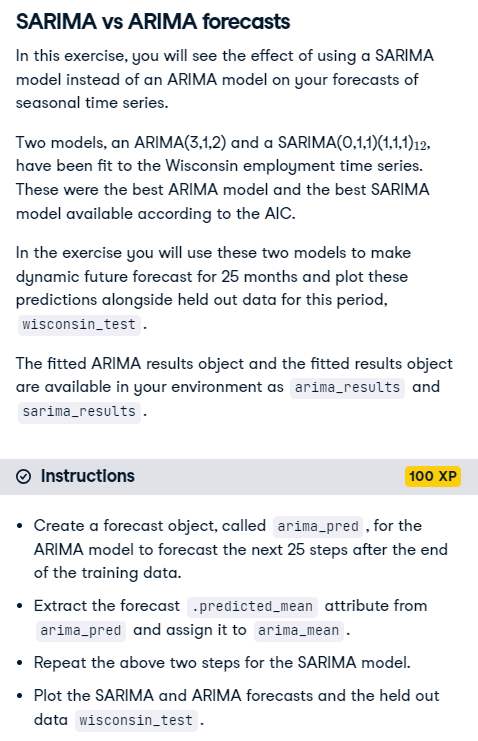

In [ ]:
#퀴즈 2-2

# Create ARIMA mean forecast
arima_pred = arima_results.get_forecast(steps=25)
arima_mean = arima_pred.predicted_mean

# Create SARIMA mean forecast
sarima_pred = sarima_results.get_forecast(steps=25)
sarima_mean = sarima_pred.predicted_mean

# Plot mean ARIMA and SARIMA predictions and observed
plt.plot(dates, sarima_mean, label='SARIMA')
plt.plot(dates, arima_mean, label='ARIMA')
plt.plot(wisconsin_test, label='observed')
plt.legend()
plt.show()




NameError: ignored

2-2 plot
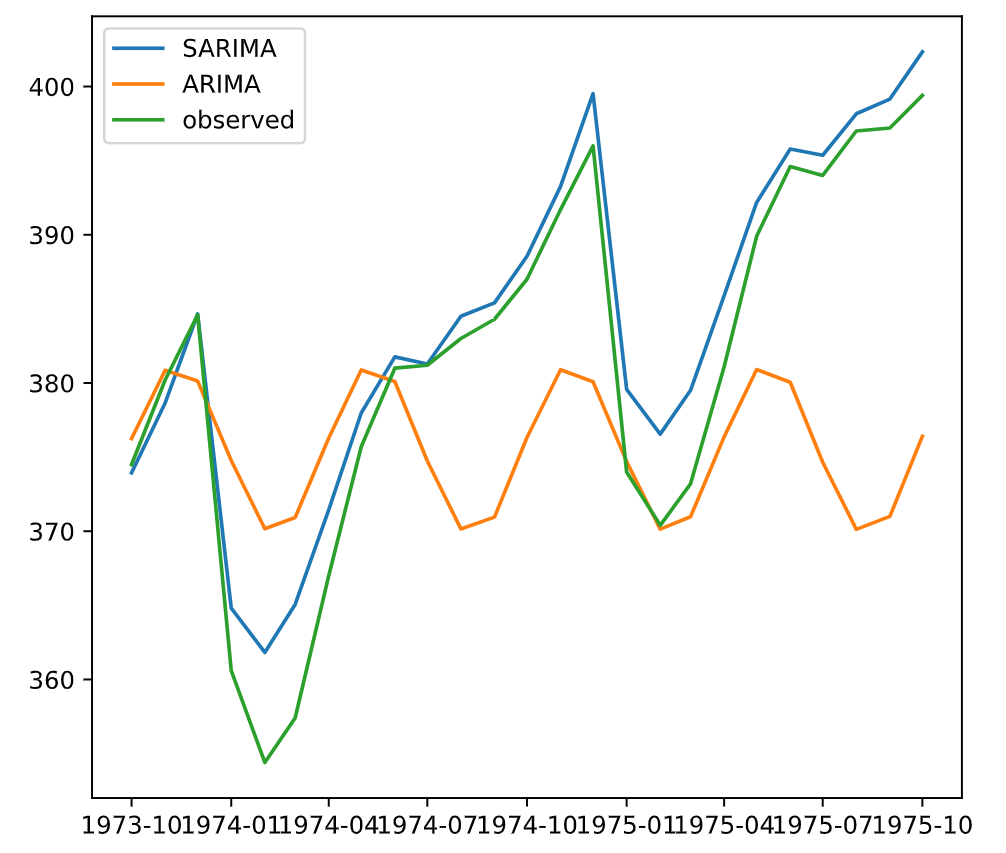

# Automation and saving

* 좋은 모델 훈련할 수 있으니, 해당 모델을 저장하고 나중에 업데이트하는 방법을 다룸.

* 이전에 for문을 통해 arima 모델 순서 검색했는데 이젠 계절 order도 들어가니 복잡.

* Searching over model orders

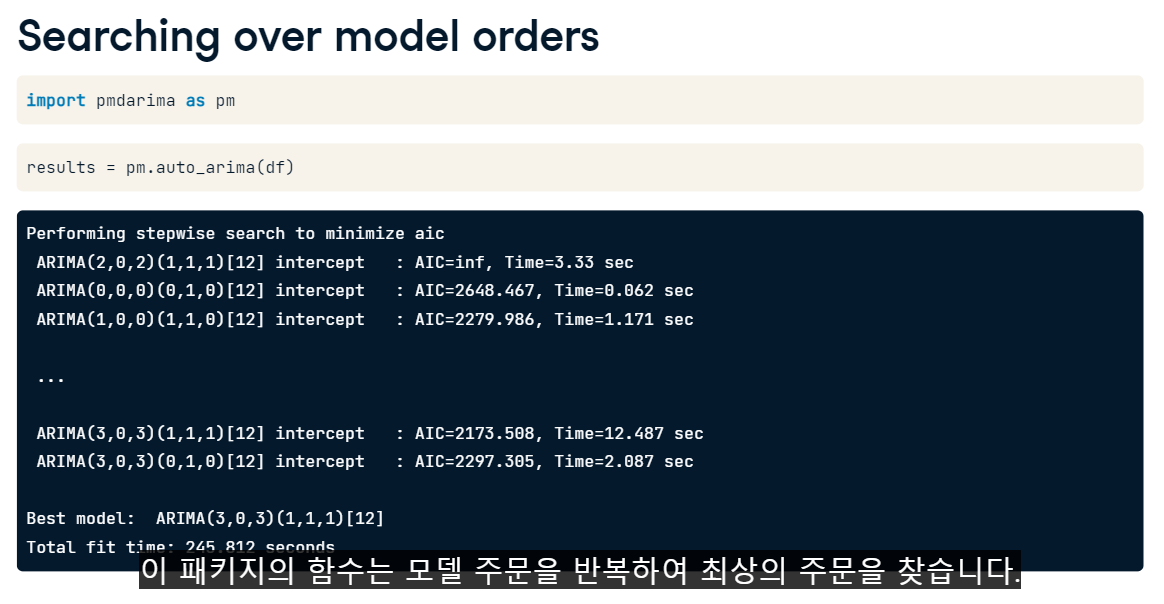


* 여기서 반환된 개체는 검색에서 찾은 최상의 모델. statsmodels SARIMAX와 거의 동일.

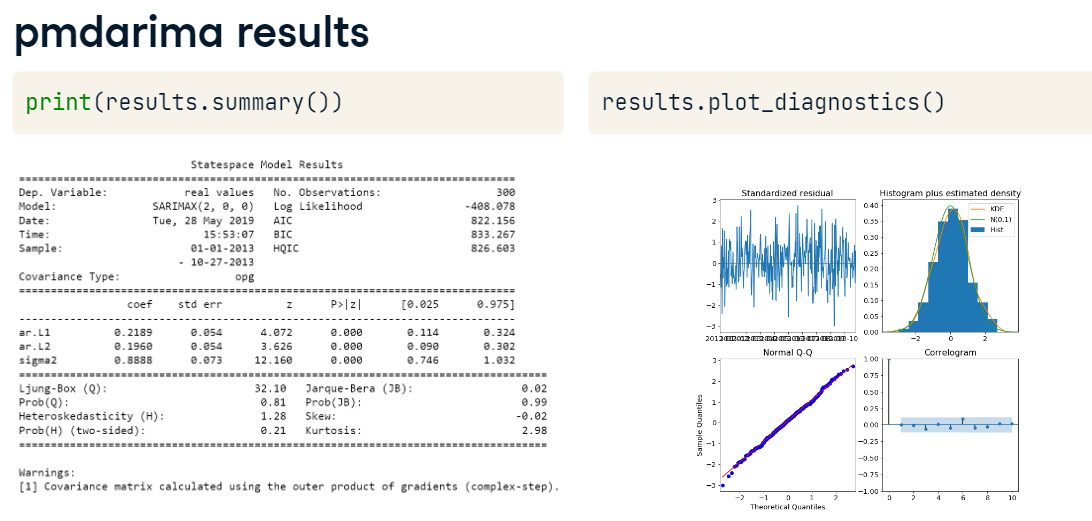

* Auto arima 기능에는 파라미터가 많아. 그 중 기본적인것들 찾아보자.

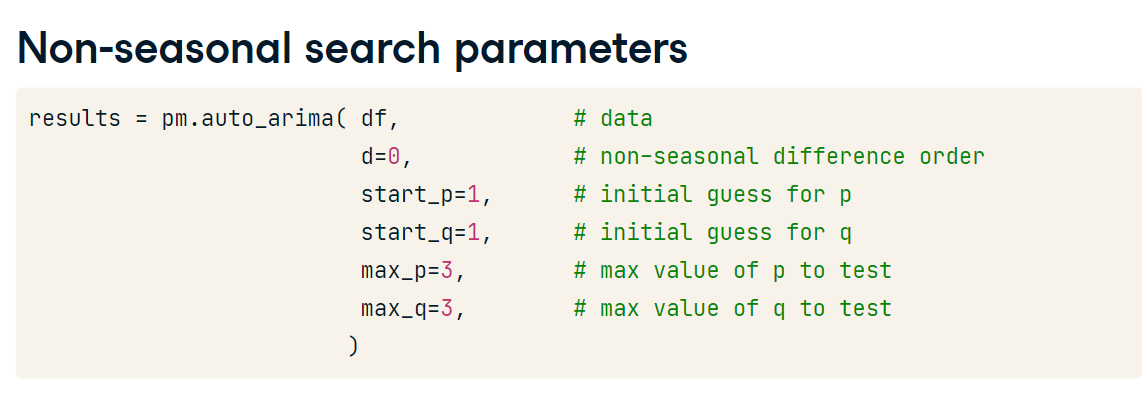

* 위는 비계절적인, 아래는 계절적인. 그래서 seasonal = True

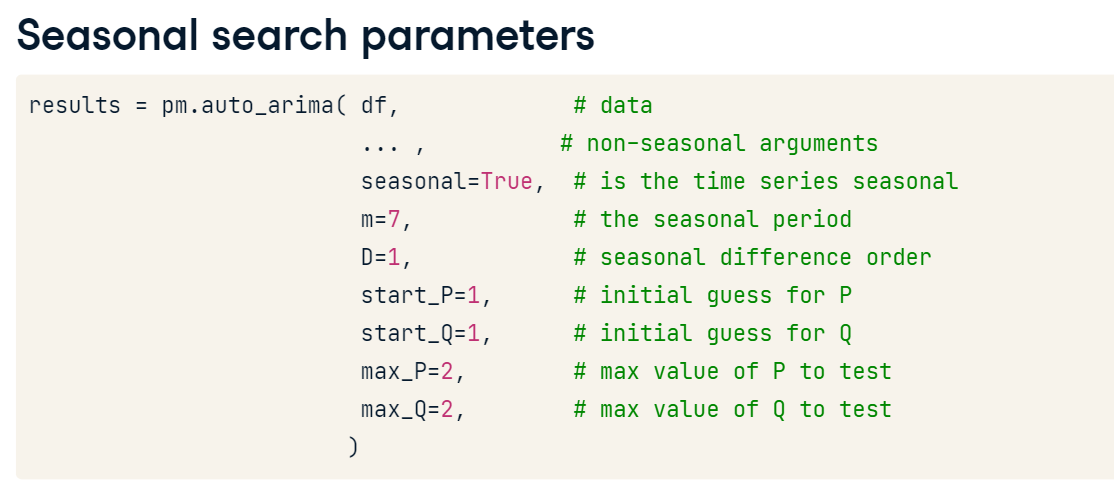


* 추가적으로 다른 non orders parameters


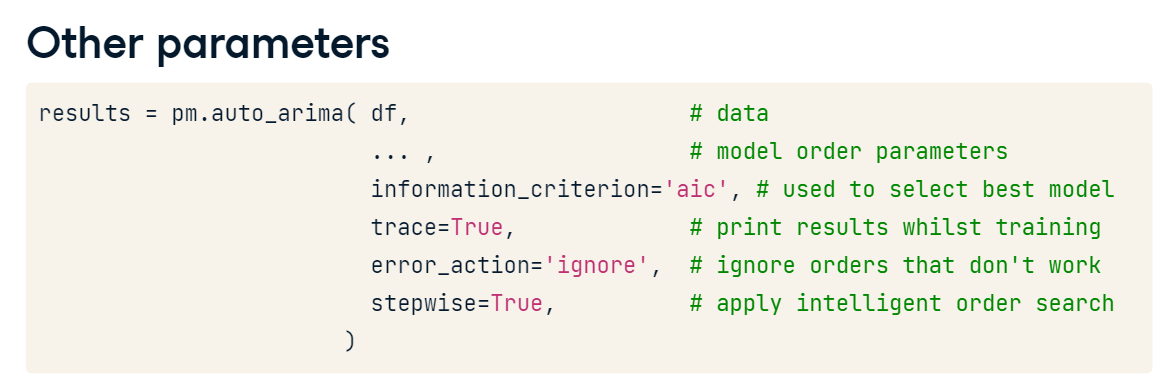

## Saving model objects
* 이 방법으로 모델을맞추면 저장하고 나중에 로드 가능.
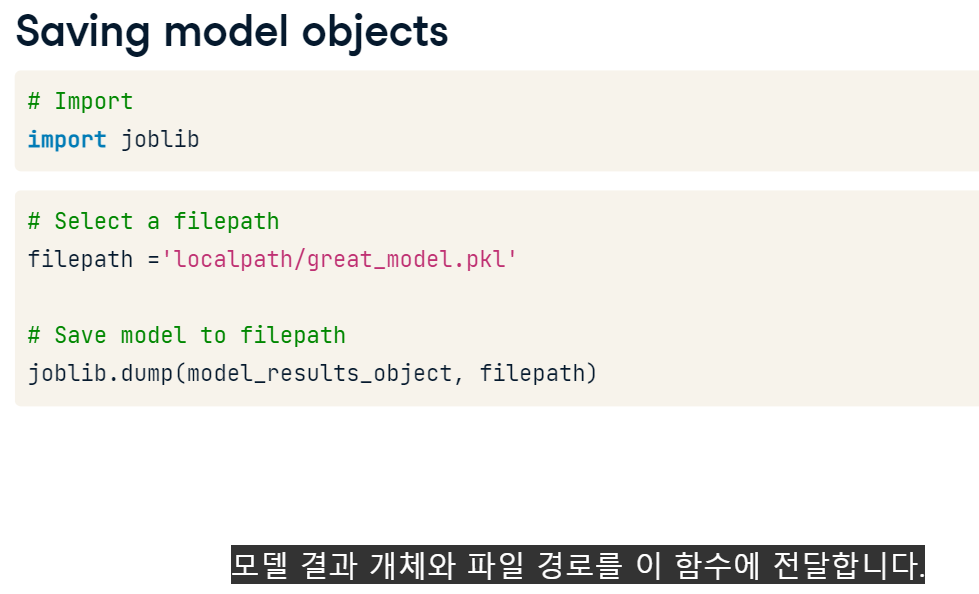

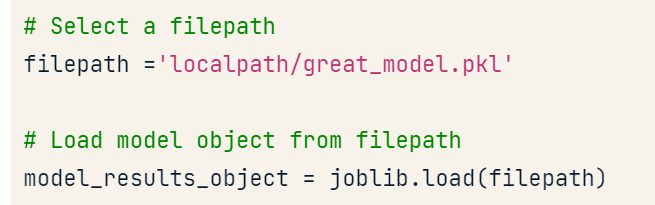

# Updating model
* 저장된 모델을 훈련하고 그 이후 수집한 데이터를 통합 가능.

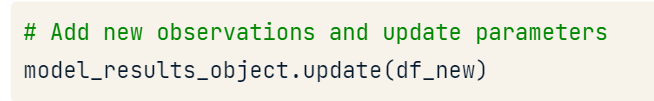

* model order를 다시 선택하는게 아니기에 업데이트의 경우 Box-Jenkins 방법의 시작 부분으로 돌아가는게 가장 좋다.



# Update Comparison

* 시계열은 데이터 업데이트가 매우 중요한데
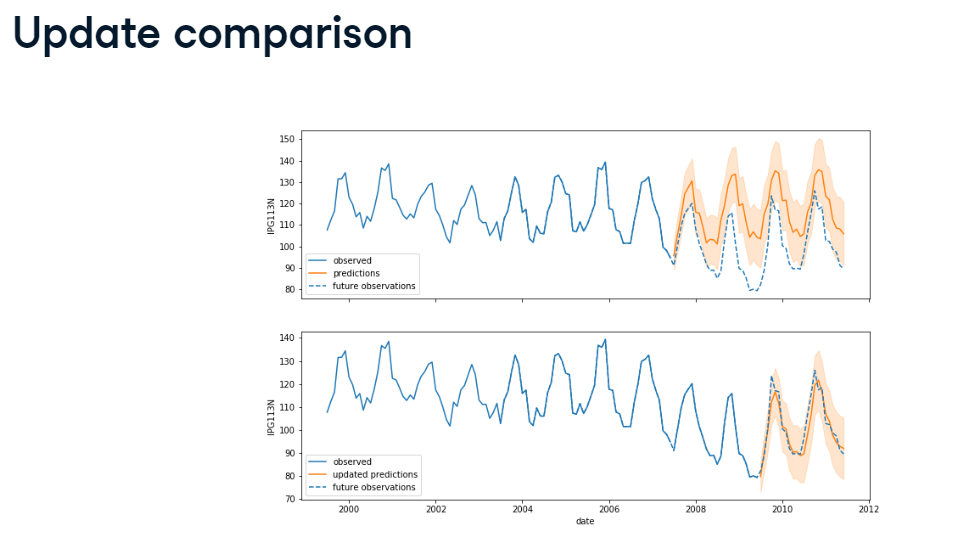

상단 예측은 2007년까지 데이터로 예측한 것이고, 하단 예측은 좀 더 최근인 2009년까지로 데이터를 업데이트 한 후 예측한 자료. 업데이트 한 모델 성능이 더 좋은 것을 알 수 있다.

In [7]:
# 퀴즈 3-1

import pmdarima as pm

# Model the time series df1 with period 7 days and set first order seasonal differencing and no non-seasonal differencing.

import pmdarima as pm


# Create auto_arima model
model1 = pm.auto_arima(df1,
                      seasonal=True, m=7,
                      d=0, D=1,
                 	  max_p=2, max_q=2,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True)

# Print model summary
print(model1.summary())

# 결과

# Print model summary
# print(model1.summary())
# Performing stepwise search to minimize aic
#  ARIMA(2,0,2)(1,1,1)[7] intercept   : AIC=inf, Time=1.08 sec
#  ARIMA(0,0,0)(0,1,0)[7] intercept   : AIC=91.630, Time=0.02 sec
#  ARIMA(1,0,0)(1,1,0)[7] intercept   : AIC=91.508, Time=0.10 sec
#  ARIMA(0,0,1)(0,1,1)[7] intercept   : AIC=inf, Time=0.37 sec
#  ARIMA(0,0,0)(0,1,0)[7]             : AIC=89.631, Time=0.03 sec
#  ARIMA(0,0,0)(1,1,0)[7] intercept   : AIC=91.596, Time=0.11 sec
#  ARIMA(0,0,0)(0,1,1)[7] intercept   : AIC=inf, Time=0.24 sec
#  ARIMA(0,0,0)(1,1,1)[7] intercept   : AIC=inf, Time=0.18 sec
#  ARIMA(1,0,0)(0,1,0)[7] intercept   : AIC=92.332, Time=0.02 sec
#  ARIMA(0,0,1)(0,1,0)[7] intercept   : AIC=92.763, Time=0.03 sec
#  ARIMA(1,0,1)(0,1,0)[7] intercept   : AIC=93.838, Time=0.05 sec

# Best model:  ARIMA(0,0,0)(0,1,0)[7]
# Total fit time: 2.225 seconds
#                                 SARIMAX Results
# ===============================================================================
# Dep. Variable:                       y   No. Observations:                   35
# Model:             SARIMAX(0, 1, 0, 7)   Log Likelihood                 -43.816
# Date:                 Fri, 18 Aug 2023   AIC                             89.631
# Time:                         10:21:48   BIC                             90.964
# Sample:                     01-01-2013   HQIC                            90.039
#                           - 02-04-2013
# Covariance Type:                   opg
# ==============================================================================
#                  coef    std err          z      P>|z|      [0.025      0.975]
# ------------------------------------------------------------------------------
# sigma2         1.3388      0.454      2.946      0.003       0.448       2.229
# ===================================================================================
# Ljung-Box (L1) (Q):                   1.43   Jarque-Bera (JB):                 0.69
# Prob(Q):                              0.23   Prob(JB):                         0.71
# Heteroskedasticity (H):               2.86   Skew:                             0.05
# Prob(H) (two-sided):                  0.13   Kurtosis:                         2.24
# ===================================================================================

# Warnings:
# [1] Covariance matrix calculated using the outer product of gradients (complex-step).


# Create a model to fit df2. Set the non-seasonal differencing to 1, the trend to a constant and set no seasonality.

# Create model
model2 = pm.auto_arima(df2,
                      seasonal=False,
                      d=1,
                      trend='c',
                 	  max_p=2, max_q=2,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True)

# Print model summary
print(model2.summary())

#결과
# Print model summary
# print(model2.summary())
# Performing stepwise search to minimize aic
#  ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1410.581, Time=0.25 sec
#  ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1415.630, Time=0.01 sec
#  ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1404.869, Time=0.02 sec
#  ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1406.232, Time=0.06 sec
#  ARIMA(0,1,0)(0,0,0)[0]             : AIC=1415.630, Time=0.01 sec
#  ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1406.822, Time=0.02 sec
#  ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1406.852, Time=0.03 sec
#  ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
#  ARIMA(1,1,0)(0,0,0)[0]             : AIC=1404.869, Time=0.02 sec

# Best model:  ARIMA(1,1,0)(0,0,0)[0]
# Total fit time: 0.532 seconds
#                                SARIMAX Results
# ==============================================================================
# Dep. Variable:                      y   No. Observations:                  100
# Model:               SARIMAX(1, 1, 0)   Log Likelihood                -699.435
# Date:                Fri, 18 Aug 2023   AIC                           1404.869
# Time:                        10:23:00   BIC                           1412.655
# Sample:                    01-01-2013   HQIC                          1408.019
#                          - 04-10-2013
# Covariance Type:                  opg
# ==============================================================================
#                  coef    std err          z      P>|z|      [0.025      0.975]
# ------------------------------------------------------------------------------
# intercept     64.0503     31.828      2.012      0.044       1.669     126.432
# ar.L1         -0.3479      0.101     -3.431      0.001      -0.547      -0.149
# sigma2      8.048e+04   1.15e+04      6.983      0.000    5.79e+04    1.03e+05
# ===================================================================================
# Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.99
# Prob(Q):                              0.94   Prob(JB):                         0.08
# Heteroskedasticity (H):               1.12   Skew:                            -0.53
# Prob(H) (two-sided):                  0.74   Kurtosis:                         3.28
# ===================================================================================

# Warnings:
# [1] Covariance matrix calculated using the outer product of gradients (complex-step)




#
# Fit a SARIMAX(p,1,q)(P,1,Q)
#  model to the data setting start_p, start_q, max_p, max_q, max_P and max_Q to 1.

# Create model for SARIMAX(p,1,q)(P,1,Q)7
model3 = pm.auto_arima(df3,
                      seasonal=True, m=7,
                      d=1, D=1,
                      start_p=1, start_q=1,
                      max_p=1, max_q=1,
                      max_P=1, max_Q=1,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True)

# Print model summary
print(model3.summary())


# # Print model summary
# print(model3.summary())
# Performing stepwise search to minimize aic
#  ARIMA(1,1,1)(1,1,1)[7]             : AIC=inf, Time=0.58 sec
#  ARIMA(0,1,0)(0,1,0)[7]             : AIC=921.211, Time=0.02 sec
#  ARIMA(1,1,0)(1,1,0)[7]             : AIC=911.049, Time=0.19 sec
#  ARIMA(0,1,1)(0,1,1)[7]             : AIC=904.675, Time=0.20 sec
#  ARIMA(0,1,1)(0,1,0)[7]             : AIC=923.261, Time=0.02 sec
#  ARIMA(0,1,1)(1,1,1)[7]             : AIC=906.113, Time=0.22 sec
#  ARIMA(0,1,1)(1,1,0)[7]             : AIC=910.465, Time=0.10 sec
#  ARIMA(0,1,0)(0,1,1)[7]             : AIC=904.729, Time=0.10 sec
#  ARIMA(1,1,1)(0,1,1)[7]             : AIC=inf, Time=0.25 sec
#  ARIMA(1,1,0)(0,1,1)[7]             : AIC=904.706, Time=0.14 sec
#  ARIMA(0,1,1)(0,1,1)[7] intercept   : AIC=906.649, Time=0.35 sec

# Best model:  ARIMA(0,1,1)(0,1,1)[7]
# Total fit time: 2.179 seconds
#                                      SARIMAX Results
# =========================================================================================
# Dep. Variable:                                 y   No. Observations:                   60
# Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 7)   Log Likelihood                -449.338
# Date:                           Fri, 18 Aug 2023   AIC                            904.675
# Time:                                   10:24:01   BIC                            910.529
# Sample:                               01-01-2013   HQIC                           906.920
#                                     - 03-01-2013
# Covariance Type:                             opg
# ==============================================================================
#                  coef    std err          z      P>|z|      [0.025      0.975]
# ------------------------------------------------------------------------------
# ma.L1         -0.2194      0.148     -1.479      0.139      -0.510       0.071
# ma.S.L7       -0.7599      0.171     -4.456      0.000      -1.094      -0.426
# sigma2      1.784e+06   6.68e+05      2.671      0.008    4.75e+05    3.09e+06
# ===================================================================================
# Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 4.36
# Prob(Q):                              0.90   Prob(JB):                         0.11
# Heteroskedasticity (H):               1.12   Skew:                             0.02
# Prob(H) (two-sided):                  0.81   Kurtosis:                         1.58
# ===================================================================================

# Warnings:
# [1] Covariance matrix calculated using the outer product of gradients (complex-step).



ModuleNotFoundError: ignored

In [8]:
# 퀴즈 3-2-1

# Import the joblib package and use it to save the model to "candy_model.pkl".

# Import joblib
import joblib

# Set model name
filename = 'candy_model.pkl'

# Pickle it
joblib.dump(model, filename)

#퀴즈 3-2-2
# Use the joblib package to load the model back in as loaded_model.

# Import
import joblib

# Set model name
filename = "candy_model.pkl"

# Load the model back in
loaded_model = joblib.load(filename)

# 3-2-3
# Update the model
loaded_model.update(df_new)

NameError: ignored

# SARIMA and Box-Jenkins

* 앞에 ARIMA에서 BOx jenkins 그대로 따라가는데 SARIMA에서 변경되는 유일한 단계는 identification.

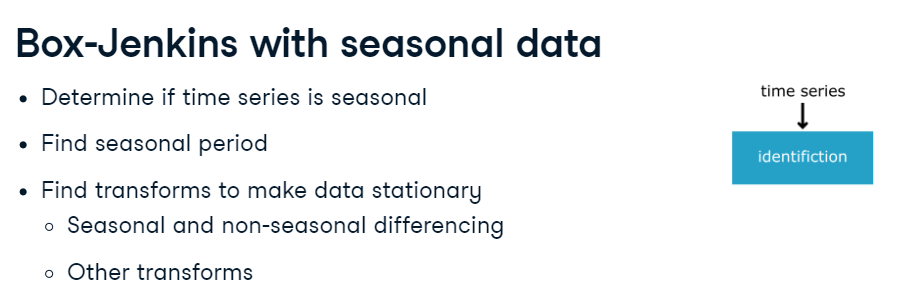

* 시계열이 계절적이면 그 계절적 기간을 찾음. 계절 시계열에서 변환도 고려.

## Mixed Differencing
* 계절성 적용할지 여부도 선택 가능.
* 계절성 비계절성 차분 이거 너무 많이 쓰지 않는 것이 경험적으로 좋다고 나옴.

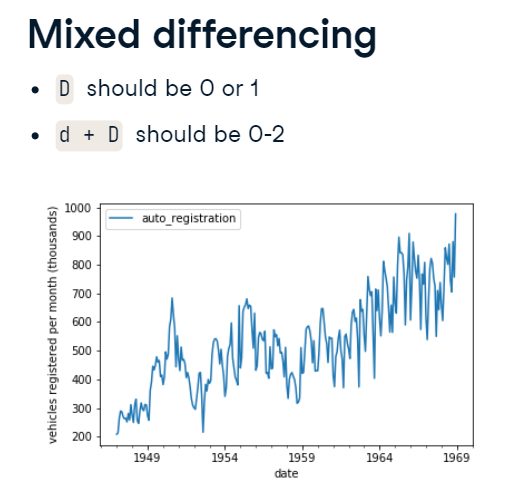

* 약한 계절성
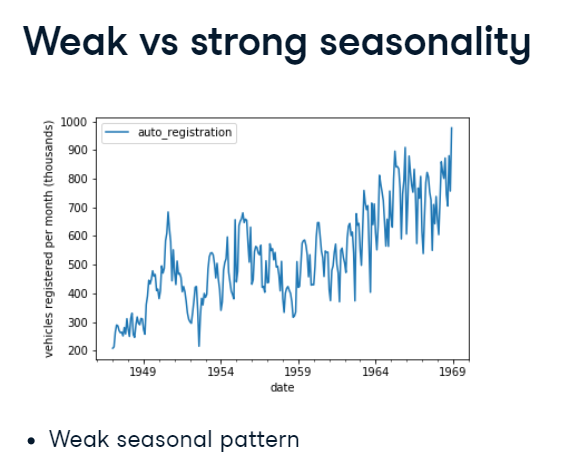

계절적 변동이 항상 같지는 않고, 식별하기도 어렵다.

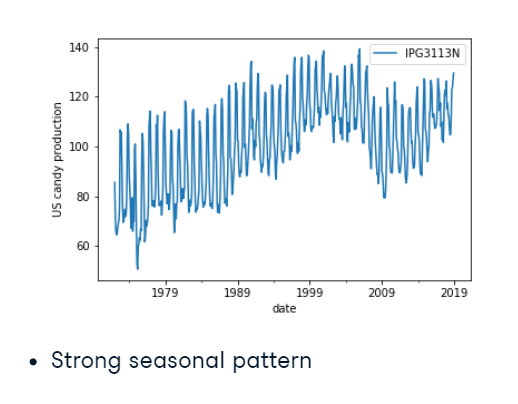

강한 계절성은 항상 계절 차분을 활용.
* 즉 약한 계절성은 계절성 차분을 필요하면 하고, 강한 계절성은 꼭 해야 함.


# Additive vs multiplicative seasonality

* ARIMA 모델과 마찬가지로 우리는 피팅 전에 시계열의 transform 도 생각해야함.

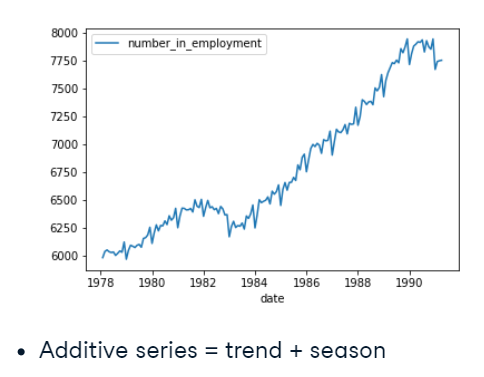

* additive series 계절성이 가산적이면 차분을 제외하고 어떤 변환도 적용할 필요가 없다. 단순히 계절적 패턴에 trend에 약간 더하거나 제거되는 것이 additive series.

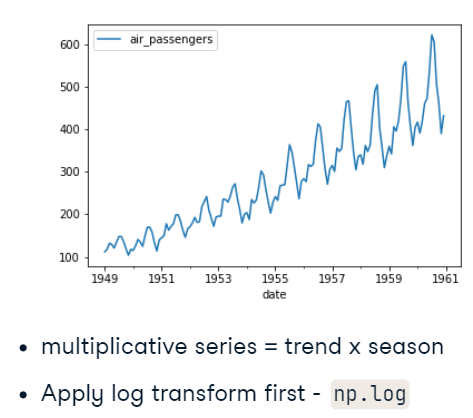

* Multiplicative 계절성인 경우 계절성 곱셈으로, 추가적인 log로 변환이 꼭 필요.

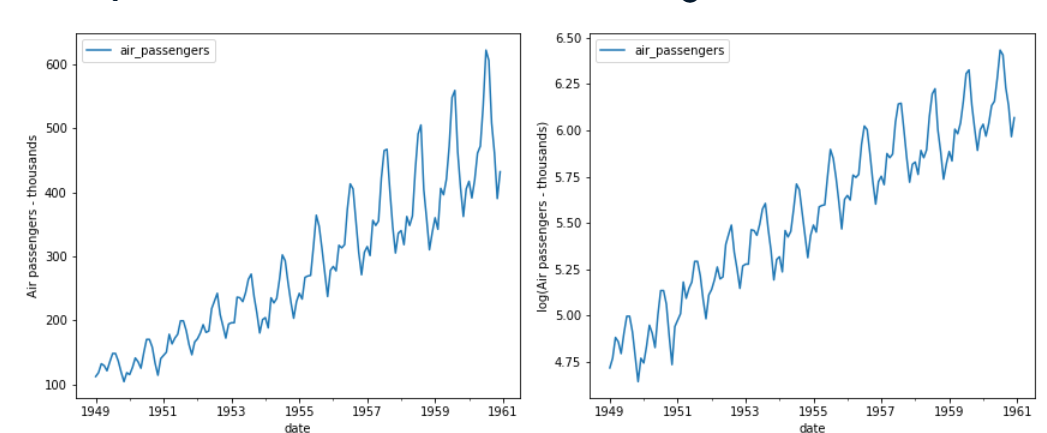

보다 시피 오른쪽 변환 후가 더 좋은 셋.


퀴즈 4 - 1

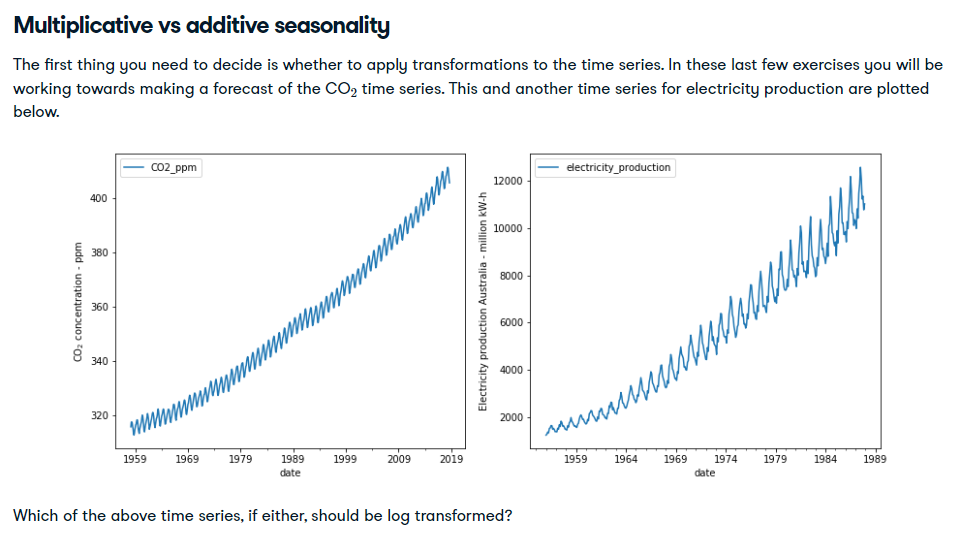

A. 오른쪽 꺼를 log transform 해야함. 계절성이 트렌드에 곱해져있어 갈 수록 변동이 심해짐.

4-2

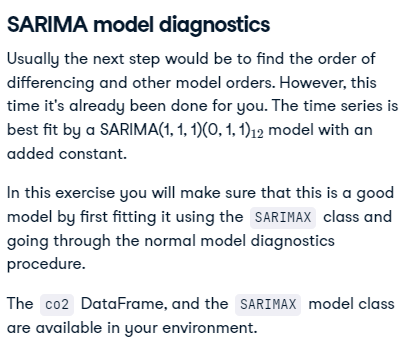

In [9]:
# 퀴즈 4-2-1
# Fit a SARIMA(1, 1, 1)(0, 1, 1)12
# model to the data.

# Import model class
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Create model object
model = SARIMAX(co2,
                order=(1, 1, 1),
                seasonal_order=(0, 1, 1, 12),
)
# Fit model
results = model.fit()

# 4-2-2 패스



NameError: ignored

4-2-3

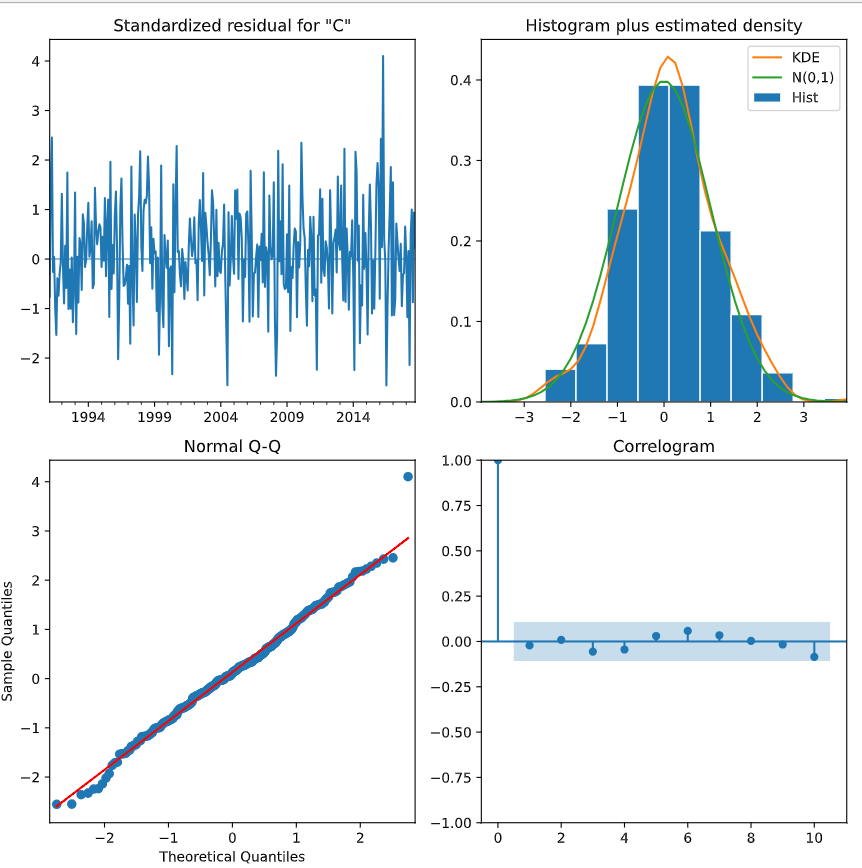



4-3

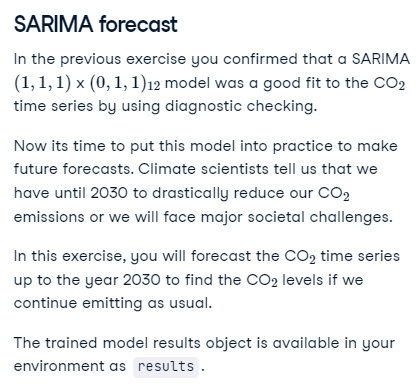

In [10]:
# 퀴즈 4-3-1

# Create a forecast object for the next 136 steps - the number of months until Jan 2030.
# Assign the .predicted_mean of the forecast to the variable mean.
# Compute the confidence intervals and assign this DataFrame to the variable conf_int.


# Create forecast object
forecast_object = results.get_forecast(steps=136)

# Extract prediction mean
mean = forecast_object.predicted_mean

# Extract the confidence intervals
conf_int = forecast_object.conf_int()

# Extract the forecast dates
dates = mean.index

4-3-2

# Plot the mean predictions against the dates.
# Shade the area between the values in the first two columns of DataFrame conf_int using dates as the x-axis values.

plt.figure()

# Plot past CO2 levels
plt.plot(co2.index, co2, label='past')

# Plot the prediction means as line
plt.plot(dates, mean, label='predicted')

# Shade between the confidence intervals
plt.fill_between(dates, conf_int.iloc[:,0], conf_int.iloc[:,1], alpha=0.2)

# Plot legend and show figure
plt.legend()
plt.show()






NameError: ignored

4-3-2 결과 plot

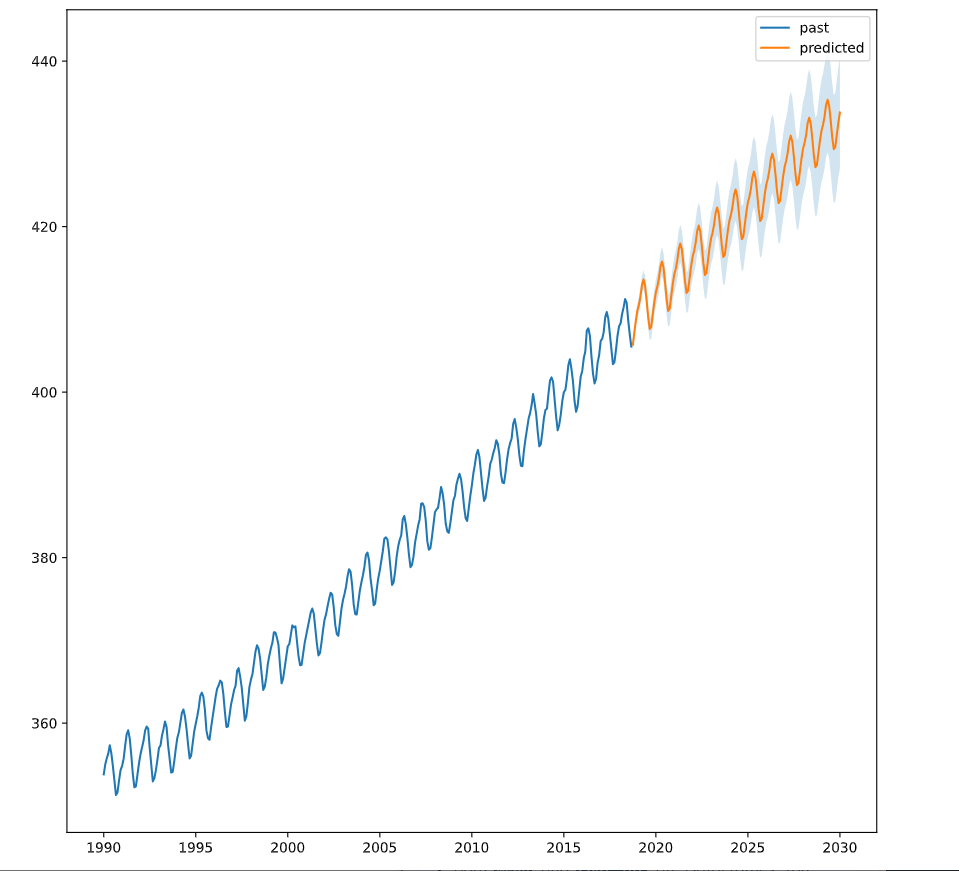

In [11]:
# 퀴즈 4-3-3

# Print the final predicted mean of the forecast.
# Print the final row of the confidence interval conf_int.
# Remember to select the correct elements by using .iloc[____] on both.

# Print last predicted mean
print(mean.iloc[-1])

# Print last confidence interval
print(conf_int.iloc[-1])


#결과

# <script.py> output:
#     433.7903227336988
#     lower CO2_ppm    427.079
#     upper CO2_ppm    440.502
#     Name: 2030-01-01 00:00:00, dtype: float64

NameError: ignored

# SARIMAX

* S : seasonal
* AR : Autoregressive
* I : integrated
* MA : moving average
* X : exogenous

# Time series modeling Framework

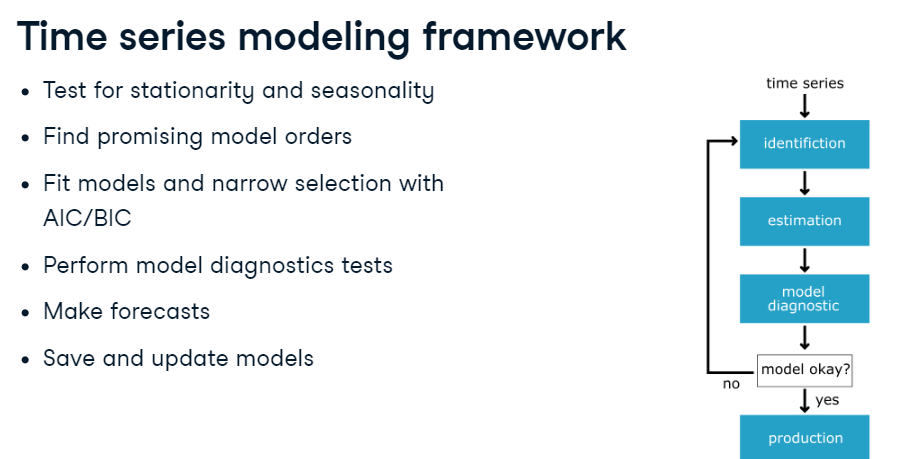

